<a href="https://colab.research.google.com/github/justopmendoza/ejemplo14/blob/main/ProyectoDS_ParteIII_Justo_Mendoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío Nro 6 -  ProyectoDS_ParteIII

# Alumno Justo Mendoza

# **¿Cómo podemos predecir el valor de TAS (Presión Arterial Sistólica) de pacientes con impertesión que serán sometidos a un tratamiento de 18 meses?**

# **Introducción**

**Contexto:** El hospital de San Miguel durante dos años, en el perído de 2016 y 2018 se realizo un estudio a pacientes hipertensos con el obejetivo de mejorar su salud y obtener datos para futuros estudios. En el trascurso del mismo se obtuvo datos de los distintos eventos y se creo una  base de datos con información de la evolución de cada caso.

Se propone a través de los datos, obtener patrones y predicir valores de TAS al final de un tratamiento, con el objetivo de que el médico pueda dar una estimación de valores de TAS a pacientes hipertesos si este somenten a un tratamiento.

También con esta información se podrá dar un diagnóstico si el paciente no se trata.


**Hipótesis**
Para dar una respuésta al paciente pacientes y utilizar la información para otras ivestigaciones se requiere verificar y confirmar las siguientes hipótesis.

1. ¿Los pacientes sometidos al tratamiento tuvieron mejoras en su patología?

2. ¿Los pacientes que NO realizaron el tratamiento y que a su vez tienen patalogías como diabetes, fuman y sufren depresión fueron los que sufrieron ACV o muerte.

3. ¿La edad y el tipo de genero influyen en el aumentos de la Presión Arterial Sistólica?

4. ¿Podemos predicir valores de TAS a pacientes que someten o no al tratamiento?

**Objetivos**

**Objetivo generales**

Realizar un análisis de los datos obtenidos durante el tratamiento, obtener patrones, verificar y confirmar la hipótesis enunciadas.Crear modelos que confirme estas conjeturas y que sirva como herramienta de para otros estudios.

**Objetivos Específicos:**

* Prevenir muertes por ACV.
* Recomendar el tratamiento.
* Mayor atensión y cuidado a personas con patologías que aumente los riesgos.
* Comunicar y asesoras a los distintos centros de salud los riegos de sufrir ACV.
* Campañas de preveción
* Participación de la comunidad.


# **Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import ppscore as pps
import warnings

In [ ]:
!pip install mlxtend

In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=16aca95fc0e49804f944ae2d46b973863c81cb4b0da4cd9500d3f7084f6f59d6
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


# **Obteniendo los datos relevantes**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
df_tratamiento = pd.read_csv('/content/gdrive/MyDrive/CoderHouse Justo/Cursos/Data Science/Datasets/Pacientes_Tratamiento.csv')
df_tratamiento

,Unnamed: 0,X,edad,genero,tad_basal,fc_basal,col_basal,ldl_basal,tg_basal,pcr_basal,...,tas_18_meses,muerte_acv,evento,pronostico,evento_mayor,pronostico_evento_mayor,evento_adverso,pred_ev_adverso,creat,evento_combinado
0,1,1,61,Hombre,92.43,74.84,187.59,139.39,490.99,0.50,...,NaN,0,0,0,1,1,0,0,0.99,0
1,2,2,66,Hombre,97.64,76.00,174.64,131.58,352.24,1.47,...,NaN,1,0,0,0,0,0,0,0.53,1
2,3,3,55,Mujer,97.19,65.32,168.48,164.45,314.34,3.51,...,139.36,0,0,0,0,1,0,1,0.25,0
3,4,4,62,Mujer,82.11,59.13,210.10,142.69,285.67,2.50,...,NaN,0,1,0,0,0,0,0,2.19,1
4,5,5,61,Hombre,99.40,64.17,166.27,135.84,147.02,0.49,...,105.89,0,1,0,1,1,1,1,2.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,68,Hombre,101.00,81.96,208.05,137.54,291.95,2.42,...,152.76,0,1,1,1,0,0,0,1.24,1
996,997,997,49,Hombre,79.57,68.14,208.43,149.46,893.91,0.90,...,138.13,0,1,0,0,0,0,0,2.58,1
997,998,998,34,Hombre,97.88,72.47,170.28,129.74,566.46,10.99,...,129.72,0,1,1,1,1,0,1,2.56,1
998,999,999,57,Hombre,98.43,89.06,194.94,128.09,332.44,2.80,...,NaN,0,0,0,0,0,0,1,1.14,0


# **Análisis de datasets : Pacientes_Tratamiento**

**Vista general**

La base de datos contiene información relacionada con tratamiento de personas con impertensión arterial. En la misma se observan sujetos que se sometieron al tratamiento y otras no. Lo cual podemos tener la hipótesis de la existencia de diferecias en los valores de TAS al final del estudio con los sujetos tratados y no tratados. Tambien podemos analizar pacientes con distintas patologías, como diabetes, colectorol, etc y su evolución durante el tratamiento.
Se puede observar que los pacientes son de distitos género y edades.



**Variables**

In [ ]:
df_tratamiento.columns # Observamos las variables de la tabla pacientes.

Index(['Unnamed: 0', 'X', 'edad', 'genero', 'tad_basal', 'fc_basal',
       'col_basal', 'ldl_basal', 'tg_basal', 'pcr_basal', 'diabetes',
       'tabaquismo', 'enf_cv', 'depresion', 'tratamiento', 'tas_basal',
       'tas_6_meses', 'tad_6_meses', 'fc_6_meses', 'acv_12_meses',
       'iam_12_meses', 'muerte_12_meses', 'efectos_adv_12_meses',
       'puntaje_satif', 'id', 'f_inicio_enf', 'f_aleatorizacion', 'f_fu_acv',
       'beta_bloc', 'estatina', 'ant_fliares', 'tas_12_meses', 'tad_12_meses',
       'fc_12_meses', 'irc', 'hiperkalemia', 'irc_6_meses', 'tas_18_meses',
       'muerte_acv', 'evento', 'pronostico', 'evento_mayor',
       'pronostico_evento_mayor', 'evento_adverso', 'pred_ev_adverso', 'creat',
       'evento_combinado'],
      dtype='object')

**Se Observan las siguientes Variables**

**--Variables continuas--**

**1. edad:** edad al momento del inicio del estudio en años.

**2. tas_basal:** presión arterial sistólica basal.

**3. tad_basal:** presión arterial diastólica basal.

**4. fc_basal:** frecuencia cardíaca basal.

**5. col_basal:** colesterol total basal en plasma.

**6. ldl_basal:** LDL-Colesterol basal en plasma.

**7. tg_basal:** triglicéridos basal en plasma.

**8. pcr_basal:** proteína C reactiva basal.

**9. tas_6_meses:** presión arterial sistólica a los 6 meses.

**10. tad_6_meses:** presión arterial diastólica a los 6 meses.

**11. fc_6_meses:** frecuencia cardíaca a los 6 meses.

**12. tas_12_meses:** presión arterial sistólica a los 12 meses.

**13. tad_12_meses:** presión arterial diastólica a los 12 meses.

**14. fc_12_meses:** frecuencia cardíaca a los 12 meses.

**15. tas_18_meses:** presión arterial sistólica a los 18 meses.

**--Variables categóricas--**

**1. genero:** mujer u hombre.

**2. diabetes:** valor 1 si está presente o 0 caso contrario.

**3. tabaquismo:** 1 si es fumador/a, 0 en caso contrario.

**4. enf_cv:** 1 si tenía enfermedad cardiovascular previa, 0 en caso contrario.

**5. depresion:**1 si tenía depresión previa, 0 en caso contrario.

**6. tratamiento:** es la variable que indica el tratamiento asignado aleatoriamente, 1 si fue asignado a tratamiento antihipertensivo, 0 si fue asignado a placebo.

**7. beta_bloc:** el betabloqueante que recibía el paciente.

**8. estatina:** la estatina que recibía el paciente.

**9. ant_fliares:** 1 si tenía antecedentes familiares de enfermedad cardiovascular, 0 en caso contrario.

**10. irc:** 1 si tiene antecedentes de insuficiencia renal, 0 en caso contrario.

**11. acv_12_meses:** 1 si tuvo ACV a los 12 meses, 0 en caso contrario.

**12. iam_12_meses:** 1 si tuvo Infarto a los 12 meses, 0 en caso contrario.

**13. muerte_12_meses:**1 si falleció a los 12 meses, 0 en caso contrario.

**14. efectos_adv_12_meses:** 1 si tuvo efectos adversos a los 12 meses, 0 en caso contrario.

**15. puntaje_satif:** puntaje de satisfacción.

**16. hiperkalemia:** 1 si desarrolló hiperkalemia, 0 en caso contrario.

**17. irc_6_meses:** 1 si tuvo insuficiencia renal a los 6 meses, 0 en caso contrario.



In [ ]:
df_tratamiento

,Unnamed: 0,X,edad,genero,tad_basal,fc_basal,col_basal,ldl_basal,tg_basal,pcr_basal,...,tas_18_meses,muerte_acv,evento,pronostico,evento_mayor,pronostico_evento_mayor,evento_adverso,pred_ev_adverso,creat,evento_combinado
0,1,1,61,Hombre,92.43,74.84,187.59,139.39,490.99,0.50,...,NaN,0,0,0,1,1,0,0,0.99,0
1,2,2,66,Hombre,97.64,76.00,174.64,131.58,352.24,1.47,...,NaN,1,0,0,0,0,0,0,0.53,1
2,3,3,55,Mujer,97.19,65.32,168.48,164.45,314.34,3.51,...,139.36,0,0,0,0,1,0,1,0.25,0
3,4,4,62,Mujer,82.11,59.13,210.10,142.69,285.67,2.50,...,NaN,0,1,0,0,0,0,0,2.19,1
4,5,5,61,Hombre,99.40,64.17,166.27,135.84,147.02,0.49,...,105.89,0,1,0,1,1,1,1,2.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,68,Hombre,101.00,81.96,208.05,137.54,291.95,2.42,...,152.76,0,1,1,1,0,0,0,1.24,1
996,997,997,49,Hombre,79.57,68.14,208.43,149.46,893.91,0.90,...,138.13,0,1,0,0,0,0,0,2.58,1
997,998,998,34,Hombre,97.88,72.47,170.28,129.74,566.46,10.99,...,129.72,0,1,1,1,1,0,1,2.56,1
998,999,999,57,Hombre,98.43,89.06,194.94,128.09,332.44,2.80,...,NaN,0,0,0,0,0,0,1,1.14,0


Se observa que la variable tas_18_meses contiene datos nulos. Se reemplazará por  ceros.

In [ ]:
df_tratamiento.fillna(0,inplace = True) # Aqui reemplazamos los valores nulos de la variable tas_18_meses
df_tratamiento

,Unnamed: 0,X,edad,genero,tad_basal,fc_basal,col_basal,ldl_basal,tg_basal,pcr_basal,...,tas_18_meses,muerte_acv,evento,pronostico,evento_mayor,pronostico_evento_mayor,evento_adverso,pred_ev_adverso,creat,evento_combinado
0,1,1,61,Hombre,92.43,74.84,187.59,139.39,490.99,0.50,...,0.00,0,0,0,1,1,0,0,0.99,0
1,2,2,66,Hombre,97.64,76.00,174.64,131.58,352.24,1.47,...,0.00,1,0,0,0,0,0,0,0.53,1
2,3,3,55,Mujer,97.19,65.32,168.48,164.45,314.34,3.51,...,139.36,0,0,0,0,1,0,1,0.25,0
3,4,4,62,Mujer,82.11,59.13,210.10,142.69,285.67,2.50,...,0.00,0,1,0,0,0,0,0,2.19,1
4,5,5,61,Hombre,99.40,64.17,166.27,135.84,147.02,0.49,...,105.89,0,1,0,1,1,1,1,2.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,68,Hombre,101.00,81.96,208.05,137.54,291.95,2.42,...,152.76,0,1,1,1,0,0,0,1.24,1
996,997,997,49,Hombre,79.57,68.14,208.43,149.46,893.91,0.90,...,138.13,0,1,0,0,0,0,0,2.58,1
997,998,998,34,Hombre,97.88,72.47,170.28,129.74,566.46,10.99,...,129.72,0,1,1,1,1,0,1,2.56,1
998,999,999,57,Hombre,98.43,89.06,194.94,128.09,332.44,2.80,...,0.00,0,0,0,0,0,0,1,1.14,0


**Medidas de resumen**

In [ ]:
df_tratamiento.describe()

,Unnamed: 0,X,edad,tad_basal,fc_basal,col_basal,ldl_basal,tg_basal,pcr_basal,diabetes,...,tas_18_meses,muerte_acv,evento,pronostico,evento_mayor,pronostico_evento_mayor,evento_adverso,pred_ev_adverso,creat,evento_combinado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,500.500000,55.066000,85.031960,71.681540,189.211420,141.21284,371.98638,2.449070,0.128000,...,93.339390,0.088000,0.290000,0.322000,0.508000,0.470000,0.049000,0.189000,1.261840,0.391000
std,288.819436,288.819436,9.604681,9.091523,11.946332,15.151935,10.97718,222.37971,2.168766,0.334257,...,60.239428,0.283437,0.453989,0.467477,0.500186,0.499349,0.215976,0.391705,0.668699,0.488219
min,1.000000,1.000000,25.000000,56.550000,31.030000,143.690000,105.46000,13.09000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000
25%,250.750000,250.750000,49.000000,78.920000,63.142500,178.627500,133.98750,196.66750,0.807500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
50%,500.500000,500.500000,55.000000,85.115000,71.680000,189.600000,141.02000,345.33500,1.870000,0.000000,...,122.035000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.170000,0.000000
75%,750.250000,750.250000,62.000000,91.065000,79.620000,199.820000,148.54500,509.27750,3.462500,0.000000,...,137.655000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.672500,1.000000
max,1000.000000,1000.000000,87.000000,115.750000,110.500000,235.700000,184.36000,1115.71000,11.860000,1.000000,...,169.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.440000,1.000000


En la lista se observa que la cantidad total de pacientes son 1000 una edad minima de 25 años y máxima de 87 años con un promedio de edad general de 55 años.

**Gráficos para el análisis del estudio**

**Analizamos la edad de los pacientes para ver la distribución de los datos**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})


**Gráfico cantidad de pacientes sometidos al estudio**



<Axes: xlabel='tratamiento', ylabel='id'>

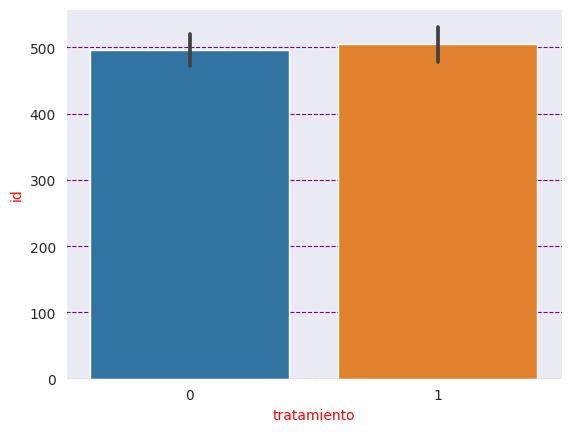

In [ ]:
sns.barplot(data=df_tratamiento, x = "tratamiento", y="id")

En el gráfico observamos la cantidad de pacientes sometidos al estudio. Vemos que hay casi un 50% realizaro el tratamiento.






**Gráfico de distribución por edad y género**

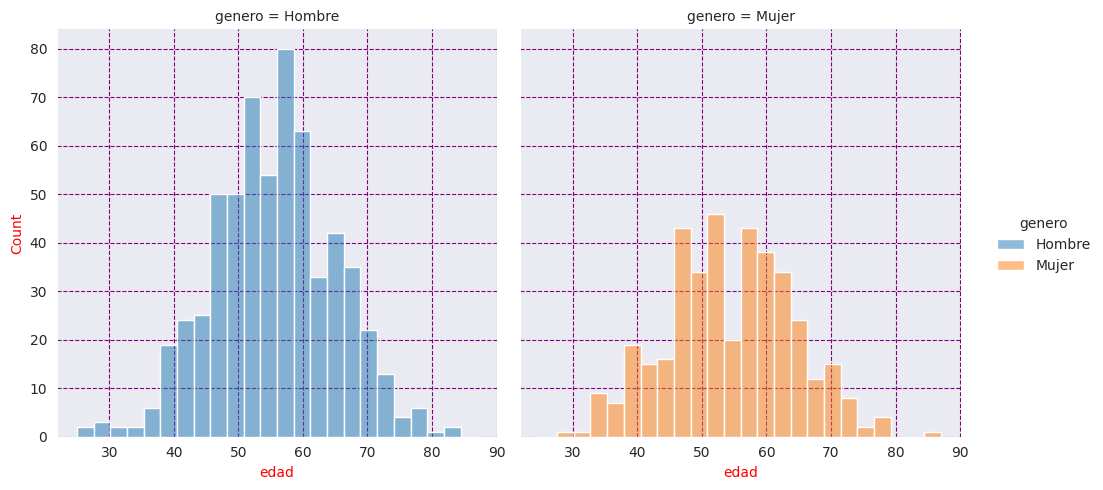

In [ ]:
sns.displot(data=df_tratamiento, x="edad", hue="genero", col="genero")


En el histograma observamos las frecuencias de las distintas edades de hombres y mujeres. Podriamos decir que en ambos hay una distribución normal de la edad. Vemos que los de mayor frecuencia son los sujetos con edades de 55 entre 60 años. La frecuecias mas bajas se encuentran en las edades de 25 a 30 años y 80 a 87 años.


**Gráfico rango de edad durante el tratamiento**

<Axes: xlabel='tratamiento', ylabel='edad'>

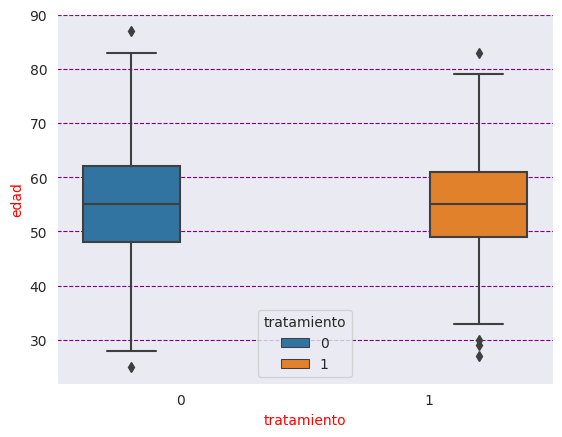

In [ ]:
sns.boxplot(data=df_tratamiento, x="tratamiento",y="edad",  hue='tratamiento')

En el  gráfico de caja observamos que los sujetos que realizaron el tratamiento y los que no lo realizaron. Vemos que la edad en ambos casos se concetra en el rango de 50 a 60 años.

**Análisis del tratamiento de la Presión Arterial Sistólica basal,6 Meses, 12 Meses y 18 Meses**

In [ ]:
import matplotlib as mpl # Importo la libreria objeto
import matplotlib.pyplot as plt # Importo la libreria estado

mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'


**Creamos unas series de datos para graficar**

**TAS al inicio del Estudio**

In [ ]:
df_tratamiento_tas_basal = pd.Series(df_tratamiento['tas_basal'])# Serie Presión sistolica al inicio
df_tratamiento_tas_basal

0      156.92
1      155.11
2      161.33
3      162.41
4      144.90
        ...  
995    170.83
996    164.06
997    158.03
998    158.82
999    140.33
Name: tas_basal, Length: 1000, dtype: float64

**TAS a los 6 meses**

In [ ]:
df_tratamiento_t6m = pd.Series(df_tratamiento['tas_6_meses'])# Creamos una serie presión sistolica a los 6 meses
df_tratamiento_t6m

0      140.91
1      146.96
2      159.38
3      143.66
4      130.48
        ...  
995    144.97
996    140.66
997    150.67
998    139.88
999    129.12
Name: tas_6_meses, Length: 1000, dtype: float64

**TAS a los 12 meses**

In [ ]:
df_tratamiento_t12m = pd.Series(df_tratamiento['tas_12_meses'])# Creamos ua serie presión sistolica a los 12 meses
df_tratamiento_t12m

0      114.17
1      138.19
2      139.53
3      114.29
4      116.40
        ...  
995    128.68
996    123.04
997    136.48
998    127.62
999    133.52
Name: tas_12_meses, Length: 1000, dtype: float64

**TAS a los 18 meses**

In [ ]:
df_tratamiento_t18m = pd.Series(df_tratamiento['tas_18_meses'])# Creamos ua serie presión sistolica a los 18 meses
df_tratamiento_t18m

0        0.00
1        0.00
2      139.36
3        0.00
4      105.89
        ...  
995    152.76
996    138.13
997    129.72
998      0.00
999    111.59
Name: tas_18_meses, Length: 1000, dtype: float64

**Edad de pacientes**

In [ ]:
df_tratamiento_edad= pd.Series(df_tratamiento['edad'])# Creamos una serie edad
df_tratamiento_edad

0      61
1      66
2      55
3      62
4      61
       ..
995    68
996    49
997    34
998    57
999    39
Name: edad, Length: 1000, dtype: int64

**Estado del tratamiento**

In [ ]:
df_tratamiento_tratamiento = pd.Series(df_tratamiento['tratamiento'])# Creamos una serie tratamiento
df_tratamiento_tratamiento

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    1
Name: tratamiento, Length: 1000, dtype: int64

**Gráficos de resultados de TAS entre los tratados y No tratados**

Text(0.0, 1.0, 'Diferencia de TAS de los tratados y No tratados')

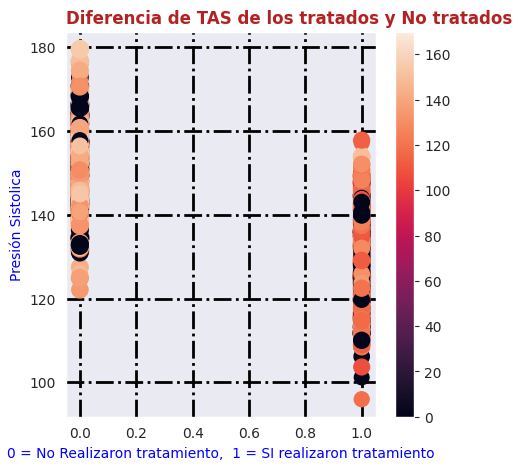

In [ ]:
fig, ax= plt.subplots(figsize=(5,5))
mapeo_colores = ax.scatter([df_tratamiento_tratamiento],[df_tratamiento_t6m],[df_tratamiento_t12m],[df_tratamiento_t18m])
fig.colorbar(mapeo_colores)
ax.set_xlabel('0 = No Realizaron tratamiento,  1 = SI realizaron tratamiento')
ax.set_ylabel('Presión Sistolica')
ax.set_title('Diferencia de TAS de los tratados y No tratados')

En el gráfico se observa una diferecia significativa de reducción de la presión arterial sitólica de los pacientes que realizaron el tratamiento. Vemos que lo que no realizaron el tratamiento desde el inicio al finalizar el mismo el rango de TAS es de 12 a 18. Y los que realizaron el tratamiento su rango es de 11 a 15.

**Gráfico de TAS por semestre**

In [ ]:
Promedio_Acumulados_tas= df_tratamiento['tas_basal'].mean().round(1),df_tratamiento['tas_6_meses'].mean().round(1),df_tratamiento['tas_12_meses'].mean().round(1),df_tratamiento['tas_18_meses'].mean().round(1)
Promedio_Acumulados_tas

(155.0, 141.9, 134.1, 93.3)

In [ ]:
columnas_selecionadas = df_tratamiento.columns[[15,16,31,37]]
columnas_selecionadas

Index(['tas_basal', 'tas_6_meses', 'tas_12_meses', 'tas_18_meses'], dtype='object')

Text(0.5, 0, 'Semestres')

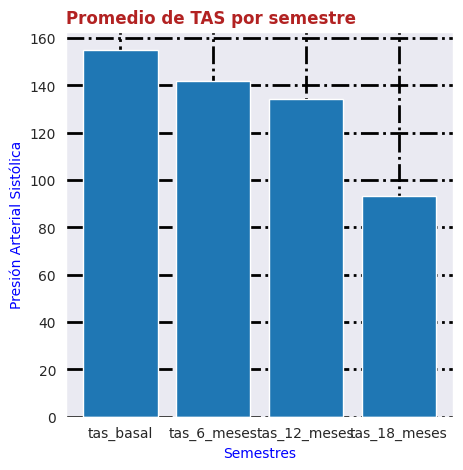

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(columnas_selecionadas,Promedio_Acumulados_tas)
ax.set_title('Promedio de TAS por semestre')
ax.set_ylabel('Presión Arterial Sistólica')
ax.set_xlabel('Semestres')



En el gráfico de barra se observa la media de TAS de cada semestre. En la misma se aprecia una disminución significativa en cada semestre. De un promedio de 155.0 al inicio del tratamiento 93.3 al final del mismo.


**Gráfico de línea - Tendecia TAS durante el tratamiento**

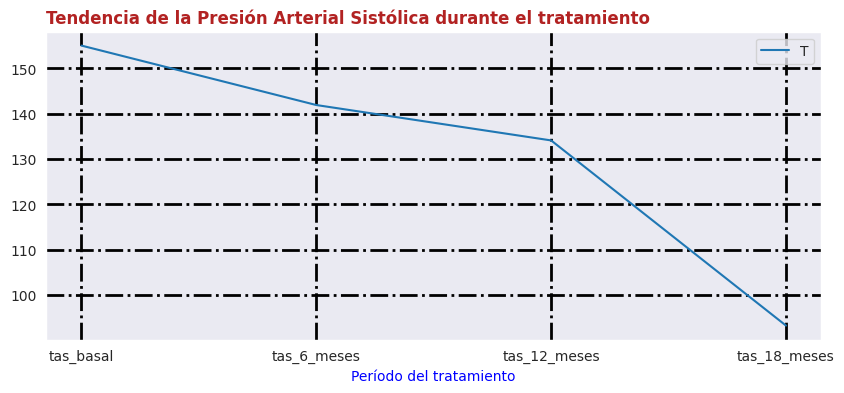

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(columnas_selecionadas,Promedio_Acumulados_tas)
ax.set_title('Tendencia de la Presión Arterial Sistólica durante el tratamiento')
ax.set_xlabel('Período del tratamiento')
ax.legend('TAS')

El gráfico se observa una tendencia bajista de la presión arterial sistólica
durante el período de tratamiento.

**Grafico de la TAS a los 18 meses entre los tratados y los o tratados por edad**

<Axes: xlabel='edad', ylabel='tas_18_meses'>

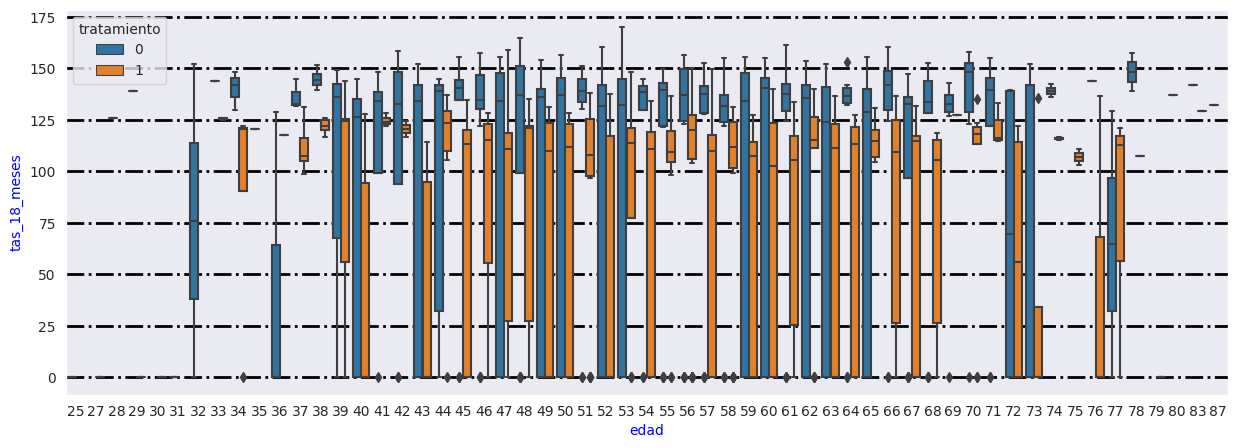

In [ ]:
fig, ax= plt.subplots(figsize=(15,5))
sns.boxplot(data= df_tratamiento, x = "edad", y="tas_18_meses",hue='tratamiento')

En el gráfico vemos los valores de presión arterial sistólica para cada edad al final del estudio. Se observa un rango de presión arterial de 13 a 11 para los que realizaron el tratamineto. Y los que no realizaron el tratamiento un rango de la TAS de 13 a 15.

**Conclución del Análisis del datasets y gráficos**

**Característica de los pacientes**

Durante este proceso de visualización y análisis de los datos. Podemos concluir que de 1000 sujetos con TAS el 50% se sumetio al tratamiento para reducir la presión arterial sistólica, tanto hombres como Mujeres, con un promedio de edad de 55 años en ambos generos.

También se observa a través de los histogramas una distribución normal de las edades tanto para los masculinos como los femeninos. Vemos que las mayor cantidad de sujetos estan en un rango de edades de 50 a 60 años con algunos datos atipicos en los rango de 25 a 30 años y 80 a 90 años.

Se observa pacientes con diferentes patologías como colesterol, diabetes, fumadores y con depresión.

**Conclusión**

Respodiendo a las hipóteis planteada se observa que durante el estudio los pacientes con Hipertesión que realizaron el tratamiento tuvieron una disminución en la TAS durante el estudio. A partir de  los 6 meses ya se observa la disminución de la presión arterial sistólica, lo mismo a los 12 meses y al final del tratamiento a los 18 meses. Tal como se observa en los distitos gráficos.

La base de datos tambien se observa sujetos que sufrieron ACV y muertes durante el estudio.

Para responder hipotesis de predecir valores de TAS para poder dar un diagnóstico a pacientes que realicen el tratamiento nos apoyaremos por un modelo de ML para poder cumplir con el objetivo.

# **Análisis Relacional**

**Correlación de Pearson**

In [ ]:
df_tratamiento.corr()

<ipython-input-47-21eb6e1b29b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tratamiento.corr()


,Unnamed: 0,X,edad,tad_basal,fc_basal,col_basal,ldl_basal,tg_basal,pcr_basal,diabetes,...,tas_18_meses,muerte_acv,evento,pronostico,evento_mayor,pronostico_evento_mayor,evento_adverso,pred_ev_adverso,creat,evento_combinado
Unnamed: 0,1.000000,1.000000,-0.034920,-0.023697,-0.085203,-0.004186,0.001684,-0.027063,-0.019489,0.063478,...,0.035715,-0.010320,0.010146,0.028447,0.018916,-0.012042,0.027256,0.006809,-0.015441,0.026149
X,1.000000,1.000000,-0.034920,-0.023697,-0.085203,-0.004186,0.001684,-0.027063,-0.019489,0.063478,...,0.035715,-0.010320,0.010146,0.028447,0.018916,-0.012042,0.027256,0.006809,-0.015441,0.026149
edad,-0.034920,-0.034920,1.000000,-0.047302,0.013817,0.025889,-0.020390,-0.044991,-0.032231,0.001731,...,-0.008781,0.019926,0.056441,0.038290,0.038020,0.044869,0.024015,0.040050,0.012613,0.055971
tad_basal,-0.023697,-0.023697,-0.047302,1.000000,0.013074,-0.033580,-0.000280,0.037767,-0.040908,-0.015561,...,-0.014972,-0.045058,-0.038767,-0.035899,0.020501,-0.004875,0.073601,0.038478,0.028626,-0.029966
fc_basal,-0.085203,-0.085203,0.013817,0.013074,1.000000,0.002704,0.017822,-0.003158,-0.007561,-0.030575,...,0.077454,-0.011617,0.006968,0.030968,-0.009603,0.007606,-0.020785,0.013404,0.020650,-0.012224
col_basal,-0.004186,-0.004186,0.025889,-0.033580,0.002704,1.000000,0.008670,-0.005257,-0.045366,0.023300,...,-0.005689,0.007879,-0.013312,-0.007635,0.024598,-0.000686,0.030372,-0.012292,0.024485,-0.005941
ldl_basal,0.001684,0.001684,-0.020390,-0.000280,0.017822,0.008670,1.000000,-0.018246,-0.001849,0.027133,...,-0.038410,0.018651,-0.012928,-0.012101,-0.047410,-0.021084,-0.109920,-0.022972,0.008318,-0.052722
tg_basal,-0.027063,-0.027063,-0.044991,0.037767,-0.003158,-0.005257,-0.018246,1.000000,0.036878,0.044474,...,0.038161,0.057520,0.011024,0.035310,-0.025977,-0.020544,0.020399,-0.028499,-0.021853,0.036576
pcr_basal,-0.019489,-0.019489,-0.032231,-0.040908,-0.007561,-0.045366,-0.001849,0.036878,1.000000,0.008491,...,-0.036333,-0.009198,0.012139,0.006763,-0.021341,0.024464,0.018049,0.050439,-0.006673,0.017001
diabetes,0.063478,0.063478,0.001731,-0.015561,-0.030575,0.023300,0.027133,0.044474,0.008491,1.000000,...,0.000714,0.007776,0.025594,-0.001384,-0.018105,-0.018951,0.010094,0.036759,0.050044,0.030375


En el analisis relacional podemos observar la relación de la variable que queremos predecir (tas_18_meses) se relacionan con la variable tratamiento un 73%, fc_12_meses 43 %, tas_12_meses 51%, fc_6_meses 30%, tas_6_meses 55%, tad_6_meses 32%.

Con respecto a variable objetivo (muerte_acv) podemos econtrar una relación con la variable acv_12_meses de un 70% y con la variable muerte_12_meses.

**Predictive Power Score**

In [ ]:
import ppscore as pps
import warnings

In [ ]:
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df_tratamiento)
ppscoreT.loc[ppscoreT['y']=='tas_18_meses']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
37,Unnamed: 0,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.950465,DecisionTreeRegressor()
84,X,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.950465,DecisionTreeRegressor()
131,edad,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,12.556465,DecisionTreeRegressor()
178,genero,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,12.160838,DecisionTreeRegressor()
225,tad_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.055575,DecisionTreeRegressor()
272,fc_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.321934,DecisionTreeRegressor()
319,col_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.661691,DecisionTreeRegressor()
366,ldl_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.710141,DecisionTreeRegressor()
413,tg_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,16.922589,DecisionTreeRegressor()
460,pcr_basal,tas_18_meses,0.000000,regression,True,mean absolute error,12.051133,14.945106,DecisionTreeRegressor()


<Axes: xlabel='x', ylabel='y'>

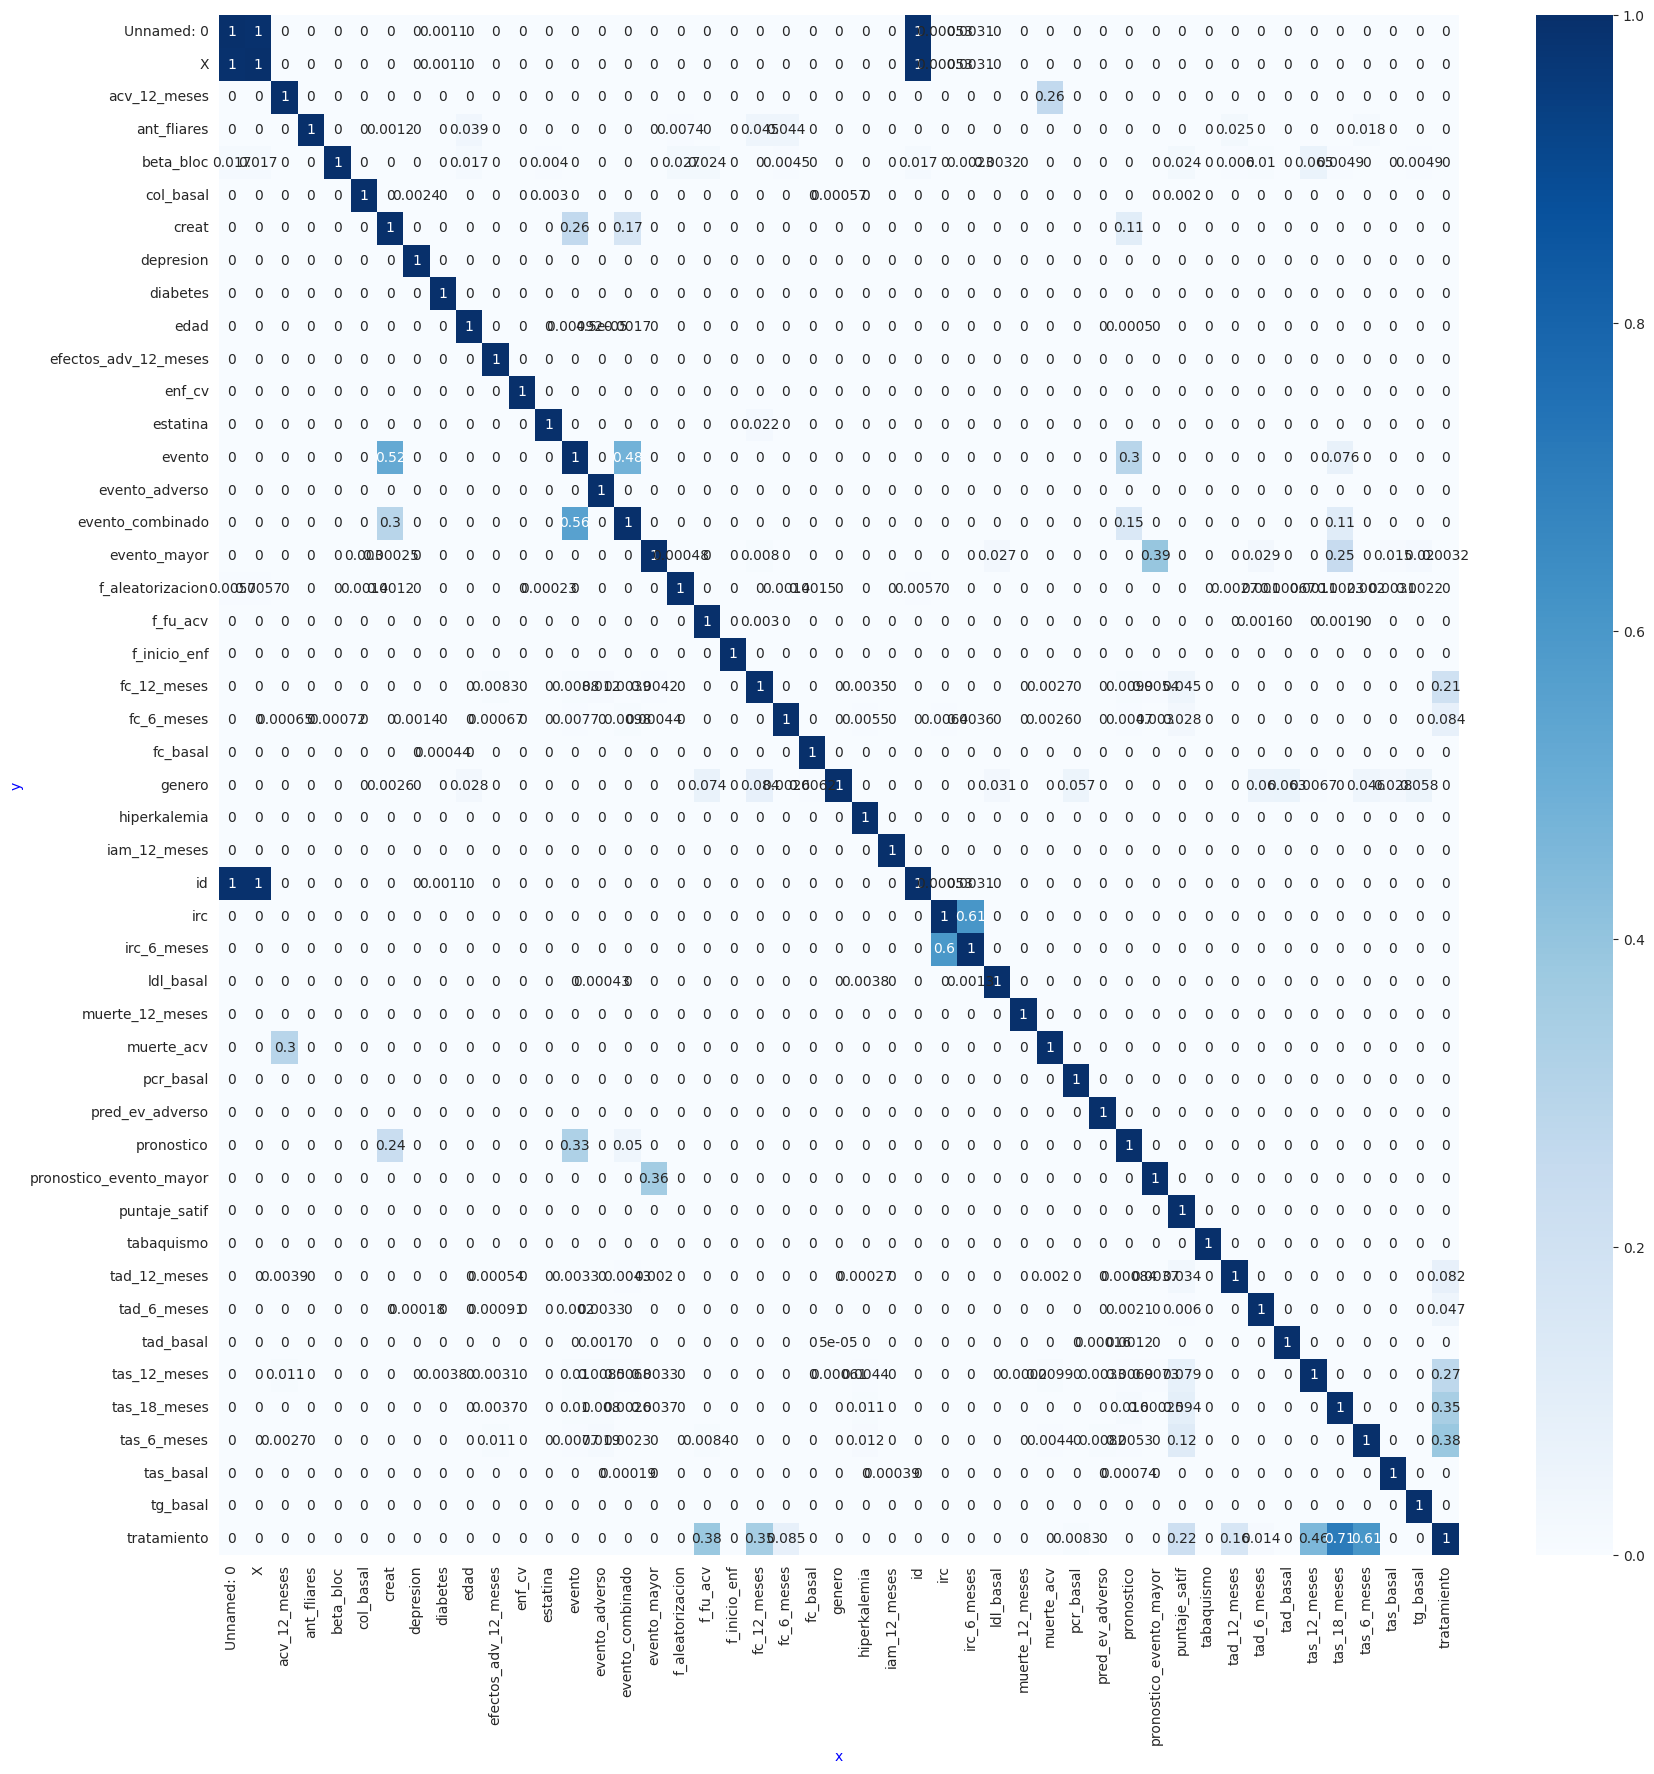

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
matrix_df = ppscoreT[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot=True, ax = ax)

Obsevamos e el gráfico las relaciones de las tas de los distintos semestres con la variable tratamiento.

# **Feature Selection**



**Reducción de dimensionalidad - Forward Selection**

**Modelo I : Modelo de regresión predicir TAS 18 Meses**



*   **Variables predictoras:** edad - tratamiento - tas_ basal - tad_6_meses - tas_6_meses - fc_6_meses - tad_12_meses - tas_12_meses - fc_12_meses.

*   **Variables objetivos:** tas_18_meses



In [ ]:
df_tratamiento = pd.read_csv('/content/gdrive/MyDrive/CoderHouse Justo/Cursos/Data Science/Datasets/Pacientes_Tratamiento.csv')

df_tratamiento.fillna(0,inplace = True)

var_pacientes_modelo_I  = ['edad','tratamiento','tas_basal','tad_6_meses','tas_6_meses','fc_6_meses','tad_12_meses','tas_12_meses','fc_12_meses']

variables_predictoras_modelo_I = df_tratamiento[var_pacientes_modelo_I ] # Variables predictoras modelo I de regresión

variable_objetivo_modelo_I =  df_tratamiento['tas_18_meses'] #  Variable objetivo modelo I de regresión

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression # Libreria para modelo de regresión.
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(variables_predictoras_modelo_I, variable_objetivo_modelo_I )
sfs.k_feature_names_     #Lista final de features

('edad',
 'tratamiento',
 'tas_basal',
 'tad_6_meses',
 'tas_6_meses',
 'tad_12_meses',
 'tas_12_meses')

**Variables predictoras y objetivo seleccionada con reducción de dimensionalidad**

In [ ]:
var_pacientes_modelo_I  = ['edad','tratamiento','tas_basal','tad_6_meses','tas_6_meses','tad_12_meses','tas_12_meses']

Y_modelo_reg_TAS18 = df_tratamiento[var_pacientes_modelo_I ] # Variables predictoras modelo I de regresión

X_modelo_reg_TAS18 =  df_tratamiento['tas_18_meses'] #  Variable objetivo modelo I de regresión

In [ ]:
Y_modelo_reg_TAS18

,edad,tratamiento,tas_basal,tad_6_meses,tas_6_meses,tad_12_meses,tas_12_meses
0,61,1,156.92,87.02,140.91,80.86,114.17
1,66,0,155.11,95.83,146.96,88.51,138.19
2,55,0,161.33,79.77,159.38,72.83,139.53
3,62,1,162.41,81.68,143.66,61.14,114.29
4,61,1,144.90,95.91,130.48,79.20,116.40
...,...,...,...,...,...,...,...
995,68,0,170.83,73.57,144.97,77.58,128.68
996,49,0,164.06,90.19,140.66,74.75,123.04
997,34,0,158.03,96.64,150.67,85.34,136.48
998,57,1,158.82,73.73,139.88,67.35,127.62


In [ ]:
X_modelo_reg_TAS18

0        0.00
1        0.00
2      139.36
3        0.00
4      105.89
        ...  
995    152.76
996    138.13
997    129.72
998      0.00
999    111.59
Name: tas_18_meses, Length: 1000, dtype: float64



---



---



---



**Modelo II: Modelo de clasificación Predecir Muerte por ACV**

*  **1. Variables predictoras:** edad - tratamiento - acv_12_meses - muerte_12_meses

*  **2. Variables objetivos:** muerte_acv

In [ ]:
df_tratamiento = pd.read_csv('/content/gdrive/MyDrive/CoderHouse Justo/Cursos/Data Science/Datasets/Pacientes_Tratamiento.csv')

df_tratamiento.fillna(0,inplace = True)

var_pacientes_modelo_II  = ['edad','tratamiento','acv_12_meses','muerte_12_meses']

variables_predictoras_modelo_II = df_tratamiento[var_pacientes_modelo_II ] # Variables predictoras modelo I de regresión

variable_objetivo_modelo_II = df_tratamiento['muerte_acv'] #  Variable objetivo modelo I de regresión

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier # Libreria para modelo de selección
# Sequential Forward Selection(sfs)
sfs = SFS(DecisionTreeClassifier(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)


In [ ]:
sfs.fit(variables_predictoras_modelo_II, variable_objetivo_modelo_II )
sfs.k_feature_names_     #Lista final de features

('edad', 'tratamiento', 'acv_12_meses', 'muerte_12_meses')

**Variables predictoras Selecionada**

In [ ]:
var_pacientes_modelo_II  = ['edad','tratamiento','acv_12_meses','muerte_12_meses']

Y_modelo_selec_MUERTEACV = df_tratamiento[var_pacientes_modelo_II ] # Variables predictoras modelo I de regresión

X_modelo_selec_MUERTEACV = df_tratamiento['muerte_acv'] #  Variable objetivo modelo I de regresión

In [ ]:
Y_modelo_selec_MUERTEACV

,edad,tratamiento,acv_12_meses,muerte_12_meses
0,61,1,0,0
1,66,0,0,1
2,55,0,0,0
3,62,1,0,0
4,61,1,0,0
...,...,...,...,...
995,68,0,0,0
996,49,0,0,0
997,34,0,0,0
998,57,1,0,0


In [ ]:
X_modelo_selec_MUERTEACV

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: muerte_acv, Length: 1000, dtype: int64

#**Entrenamiento y Prueba**

# **Entrenamiento y prueba Modelo I Regresión TAS 18 Meses**

**Entrenamiento**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_pred_TAS18,test_pred_TAS18,train_obj_TAS18,test_obj_TAS18 = train_test_split(Y_modelo_reg_TAS18, X_modelo_reg_TAS18,
                                                                                  test_size=0.25,
                                                                                  random_state=42)



In [ ]:
train_pred_TAS18

,edad,tratamiento,tas_basal,tad_6_meses,tas_6_meses,tad_12_meses,tas_12_meses
82,62,0,158.67,70.45,158.55,77.52,149.29
991,70,1,170.32,94.72,123.73,71.03,115.22
789,55,0,147.19,80.84,158.03,74.07,134.07
894,45,0,164.43,102.37,142.34,79.12,128.52
398,47,1,164.87,80.66,120.51,66.28,135.69
...,...,...,...,...,...,...,...
106,62,0,161.12,68.79,146.11,76.69,142.70
270,53,0,155.87,97.04,157.74,64.25,134.80
860,50,1,148.07,73.74,128.73,75.95,127.85
435,52,0,157.23,77.71,140.59,83.81,140.24


In [ ]:
train_obj_TAS18

82     141.67
991    135.11
789    143.21
894    147.55
398    111.72
        ...  
106    129.26
270    157.71
860      0.00
435      0.00
102    151.18
Name: tas_18_meses, Length: 750, dtype: float64

Se observa la disminución en los datos de entrenamiento.

**Prueba**

In [ ]:
from sklearn.linear_model import LinearRegression

ml_TAS18 = LinearRegression () # Modelo.

ml_TAS18.fit(train_pred_TAS18,train_obj_TAS18) # Entrenando al modelo.

LinearRegression()

In [ ]:
#                 edad, tratamiento, tas_basal, tad_6_meses, tas_6_meses , tad_12_meses , tas_12_meses

df_tratamiento = ([[56,1,170.30,92.43,140.30,86.88,130.15],[75,0,190.30,10.20,170.26,93.12,140.46]])

print(" Presión Arterial Sistólica probable a los 18 meses: ", ml_TAS18.predict(df_tratamiento))



 Presión Arterial Sistólica probable a los 18 meses:  [ 81.98242276 110.68649931]


**Cálculos de Métricas**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Error Absoluto Medio (MAE - Mean Absolute Error)**

In [ ]:
mae = mean_absolute_error(train_obj_TAS18,train_pred_TAS18)

ValueError: ignored

**Error Cuadrático Medio (MSE - Mean Squared Error)**

In [ ]:
mse = mean_squared_error(train_obj_TAS18,train_pred_TAS18)

ValueError: ignored

**Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**

In [ ]:
rmse = np.sqrt(mse)

NameError: ignored

**Coeficiente de Determinación (R-cuadrado o R²)|**

In [ ]:
r2 = r2_score(train_obj_TAS18,train_pred_TAS18)

ValueError: ignored

# **Entrenamiento y prueba Modelo II Clasificación Muerte ACV**

**Entrenamiento**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_pred_MUERTEACV,test_pred_MUERTEACV,train_obj_MUERTEACV,test_obj_MUERTEACV = train_test_split(Y_modelo_selec_MUERTEACV, X_modelo_selec_MUERTEACV,
                                                                                  test_size=0.25,
                                                                                  random_state=42)


In [ ]:
train_pred_MUERTEACV

,edad,tratamiento,acv_12_meses,muerte_12_meses
82,62,0,0,0
991,70,1,0,0
789,55,0,0,0
894,45,0,0,0
398,47,1,0,0
...,...,...,...,...
106,62,0,0,0
270,53,0,0,0
860,50,1,0,0
435,52,0,0,0


In [ ]:
train_obj_MUERTEACV

82     0
991    0
789    0
894    0
398    0
      ..
106    0
270    0
860    0
435    0
102    0
Name: muerte_acv, Length: 750, dtype: int64

**Prueba**


In [ ]:
from sklearn.tree import DecisionTreeClassifier


ml_MUERTEACV = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) # Modelo.



ml_MUERTEACV.fit(train_pred_MUERTEACV,train_obj_MUERTEACV) # Entrenando al modelo.

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
#                   |edad| |tratamiento|   |acv_12_meses| |muerte_12_meses|
df_tratamiento = ([[  55   ,  1       ,      1       ,      0      ]])

print(" La probabilidad de que el paciente muera por ACV es: ",ml_MUERTEACV.predict(df_tratamiento))

# Si = 1
# No = 0

 La probabilidad de que el paciente muera por ACV es:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(ml_MUERTEACV.predict_proba(df_tratamiento))

[[0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


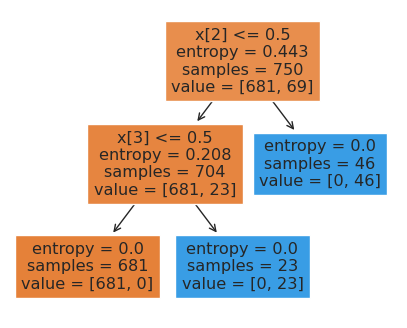

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(5,4))
_=tree.plot_tree(ml_MUERTEACV,filled=True)

**Cálculos de Métrica**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
precision = precision_score(train_obj_MUERTEACV,train_pred_MUERTEACV,)

ValueError: ignored

In [ ]:
recall = recall_score(train_obj_MUERTEACV,train_pred_MUERTEACV)

ValueError: ignored



---



---



---

